In [15]:
from getngrams import * 
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
try:
    os.mkdir('results')
except:
    print('Dir exists already')

Dir exists already


In [23]:
queries={
    'ML2000':'machine learning,artificial intelligence,big data,neural network,expert system -startYear=2000',
    'ML':'machine learning,artificial intelligence,big data,neural network,expert system -startYear=1950',
    'space':'spacecraft, satellite -startYear=1850',
    'nuclear':'nuclear energy,nuclear reactor,nuclear physics,nuclear bomb -startYear=1850',
    'physics':'quantum mechanics,theory of relativity, general relativity, special relativity -startYear=1850',
    'medicine':'vaccination,antibiotics,smallpox,polio -startYear=1850',
    'all':'spacecraft,antibiotics,neural network,nuclear energy -startYear=1900',
    'allAndInternet':'internet,spacecraft,antibiotics,neural network,nuclear energy -startYear=1900'}
queries={key:val+' -caseInsensitive' for (key,val) in queries.items()}
queries={key:val+' -filename='+os.path.join('results',key+'.csv') for (key,val) in queries.items()}

In [24]:
for q in queries.values():
    runQuery(q+' -noprint')

Data saved to results/ML2000.csv
Data saved to results/ML.csv
Data saved to results/space.csv
Data saved to results/nuclear.csv
Data saved to results/physics.csv
Data saved to results/medicine.csv
Data saved to results/all.csv
Data saved to results/allAndInternet.csv


### Plotting ###

In [25]:
datasets={}
for key in queries.keys():
    datasets[key] = pd.read_csv(os.path.join('results',key+'.csv'),index_col=0,parse_dates=True)

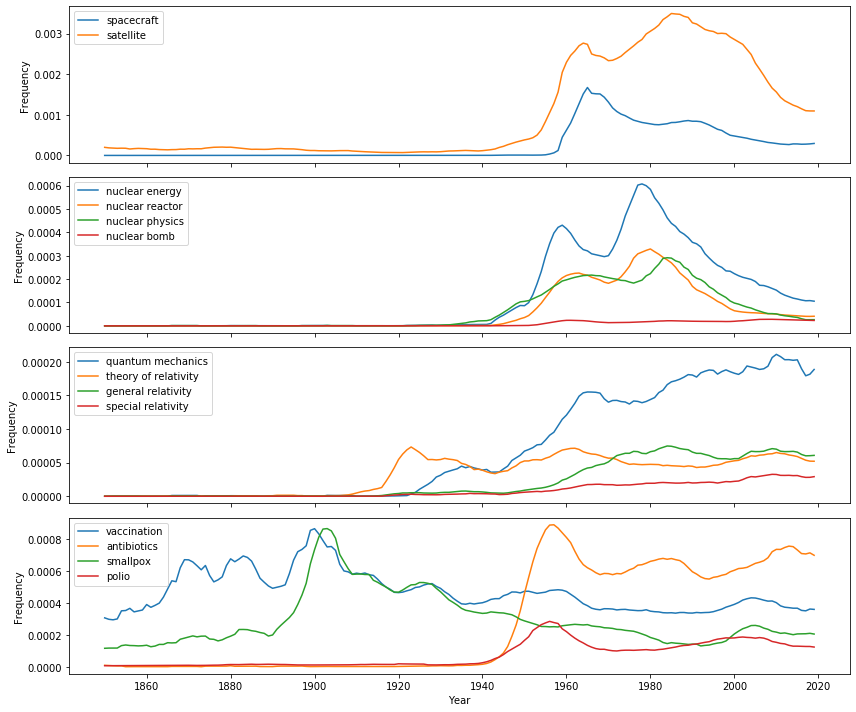

In [35]:
fig, axs=plt.subplots(4,1,figsize=(12,10),sharex='col')
sets=['space','nuclear','physics','medicine']
for k,ax in enumerate(axs):
    data=datasets[sets[k]]
    for col in data.columns:
        ax.plot(data.index,[i*100 for i in data[col]],label=col)
    ax.legend(loc='upper left')
    ax.set_ylabel('Frequency')
ax.set_xlabel('Year')
plt.tight_layout()

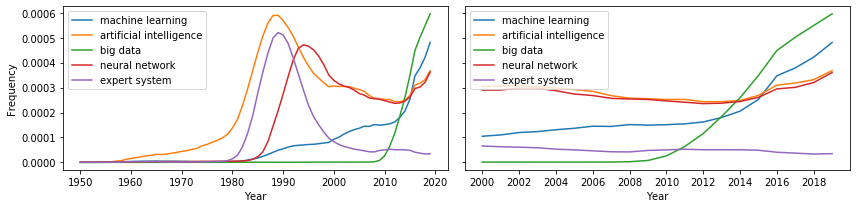

In [41]:
fig, axs=plt.subplots(1,2,figsize=(12,3),sharey='row')
sets=['ML','ML2000']
for k,ax in enumerate(axs):
    data=datasets[sets[k]]
    for col in data.columns:
        ax.plot(data.index,[i*100 for i in data[col]],label=col)
    ax.legend(loc='upper left')
    ax.set_xlabel('Year')
axs[0].set_ylabel('Frequency')

plt.tight_layout()

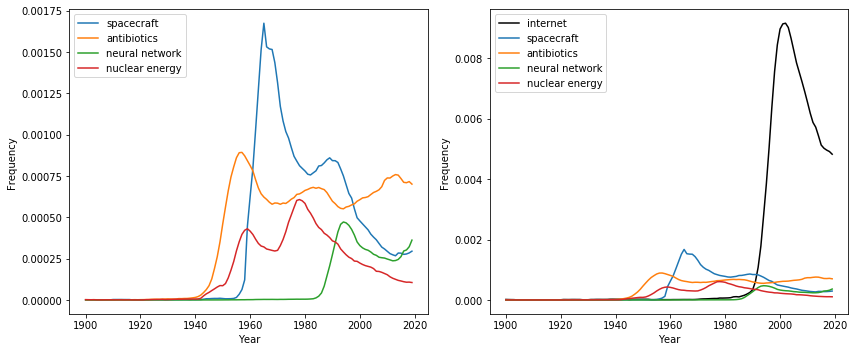

In [46]:
fig, axs=plt.subplots(1,2,figsize=(12,5))
sets=['all','allAndInternet']
for k,ax in enumerate(axs):
    data=datasets[sets[k]]
    for col in data.columns:
        if col!='internet':
            ax.plot(data.index,[i*100 for i in data[col]],label=col)
        else:
            ax.plot(data.index,[i*100 for i in data[col]],label=col,c='black')
    ax.legend(loc='upper left')
    ax.set_xlabel('Year')
    ax.set_ylabel('Frequency')

plt.tight_layout()